## 정리한 데이터 불러오기

In [1]:
import pandas as pd

df_protein = pd.read_csv('/Users/doukkim/Downloads/protein_clean.csv', index_col = [0])

In [2]:
df_protein.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81474 entries, 0 to 81473
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   classification            81474 non-null  object 
 1   experimentalTechnique     81474 non-null  object 
 2   residueCount              81474 non-null  int64  
 3   resolution                81474 non-null  float64
 4   structureMolecularWeight  81474 non-null  float64
 5   crystallizationTempK      81474 non-null  float64
 6   densityPercentSol         81474 non-null  float64
 7   phValue                   81474 non-null  float64
 8   chainId                   81474 non-null  object 
 9   A                         81474 non-null  int64  
 10  K                         81474 non-null  int64  
 11  N                         81474 non-null  int64  
 12  D                         81474 non-null  int64  
 13  C                         81474 non-null  int64  
 14  H     

In [3]:
df_protein

,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityPercentSol,phValue,chainId,A,...,F,R,Y,W,E,Q,non-polar_amino,polar_amino,acidic_amino,basic_amino
0,Others,X-RAY DIFFRACTION,232,2.53,26562.73,277.0,34.00,7.7,A,12,...,7,16,5,1,17,12,97,61,29,45
1,Others,X-RAY DIFFRACTION,430,2.20,47657.25,277.0,51.03,7.6,AB,38,...,4,26,2,2,36,14,222,78,64,66
2,Others,X-RAY DIFFRACTION,222,2.20,25718.97,277.0,43.00,8.0,ABCD,12,...,10,16,14,2,16,8,84,72,26,36
3,Others,X-RAY DIFFRACTION,222,2.20,25786.99,277.0,54.00,4.6,ABCD,12,...,10,16,14,2,16,8,84,72,26,36
4,Others,X-RAY DIFFRACTION,222,2.00,25779.02,277.0,54.00,4.6,ABCD,12,...,10,16,14,2,16,8,84,72,26,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81469,Others,X-RAY DIFFRACTION,280,2.18,36239.98,293.0,70.23,7.5,T,12,...,7,14,13,1,22,10,110,79,44,47
81470,PROTEIN BINDING,X-RAY DIFFRACTION,837,2.54,93918.31,298.0,62.96,4.0,A,29,...,47,21,15,8,34,19,410,273,74,80
81471,HYDROLASE,X-RAY DIFFRACTION,316,1.43,35228.97,293.0,46.68,6.0,A,28,...,10,10,28,3,7,14,143,113,31,29
81472,Others,X-RAY DIFFRACTION,207,1.50,22377.15,293.0,59.60,7.5,A,16,...,11,12,8,3,6,4,94,72,18,23


## 분석

### 데이터 셋 나누기 (train / validation / test)

In [3]:
target = "classification"
features = df_protein.drop(target, axis = 1).columns

In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_protein, test_size = 0.2, random_state = 1, stratify = df_protein[target])
train, val = train_test_split(train, test_size = 0.2, random_state = 1, stratify = train[target])

In [5]:
train.shape, val.shape, test.shape

((52143, 33), (13036, 33), (16295, 33))

In [6]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

### 기준모델

In [18]:
#필요한 라이브러리 불러오기
from sklearn.preprocessing import StandardScaler
from category_encoders import OrdinalEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.multiclass import OneVsRestClassifier

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import accuracy_score, classification_report

from sklearn.utils.class_weight import compute_sample_weight

In [8]:
#기준모델 생성
#LogisticRegression
#logistic = make_pipeline(
#    OneHotEncoder(),
#    StandardScaler(),
#    LogisticRegression(multi_class = "ovr", max_iter = 200, n_jobs = -1))


#logistic.fit(X_train, y_train)

In [9]:
#예측값 도출 (기준모델)
#y_pred_logistic_train = logistic.predict(X_train)
#y_pred_logistic_val = logistic.predict(X_val)

#평가 (기준모델)
#print('\n <기준모델 (Logistic Regression)>')
#print('훈련데이터 정확도: ', accuracy_score(y_train, y_pred_logistic_train)) #훈련데이터 정확도:  0.39614138043457414
#print('검증데이터 정확도: ', accuracy_score(y_val, y_pred_logistic_val)) #검증데이터 정확도:  0.3787204664007364

### 모델 학습 및 평가  (hyperparameter tuning X)

In [74]:
#Model 생성
#RandomForestClassifier
forest = RandomForestClassifier( random_state = 1
                                , n_jobs = -1
                                , criterion = "entropy")

#XGBClassifier
eval_set = [(X_val_encoded, y_val)]

xgb = XGBClassifier(random_state = 1
                    , n_jobs = -1
                    , num_class = 16
                    , learning_rate = 0.2
                    , eval_metric = "mlogloss")

#OneVsRestClassifier_RandomForest
one_rest_forest = OneVsRestClassifier(forest, n_jobs=-1)

#OneVsRestClassifier_XGB
one_rest_xgb = OneVsRestClassifier(xgb, n_jobs=-1)


#OrdinalEncoding
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

In [65]:
#모델 학습
forest.fit(X_train_encoded, y_train)
xgb.fit(X_train_encoded, y_train, eval_set = eval_set, early_stopping_rounds = 50, eval_metric = "mlogloss")
one_rest_forest.fit(X_train_encoded, y_train)
one_rest_xgb.fit(X_train_encoded, y_train)

/Users/doukkim/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:2.44459
[1]	validation_0-mlogloss:2.27573
[2]	validation_0-mlogloss:2.15527
[3]	validation_0-mlogloss:2.06273
[4]	validation_0-mlogloss:1.99063
[5]	validation_0-mlogloss:1.93054
[6]	validation_0-mlogloss:1.88041
[7]	validation_0-mlogloss:1.83608
[8]	validation_0-mlogloss:1.79851
[9]	validation_0-mlogloss:1.76419
[10]	validation_0-mlogloss:1.73524
[11]	validation_0-mlogloss:1.71098
[12]	validation_0-mlogloss:1.68885
[13]	validation_0-mlogloss:1.66848
[14]	validation_0-mlogloss:1.65073
[15]	validation_0-mlogloss:1.63437
[16]	validation_0-mlogloss:1.61849
[17]	validation_0-mlogloss:1.60285
[18]	validation_0-mlogloss:1.59008
[19]	validation_0-mlogloss:1.57754
[20]	validation_0-mlogloss:1.56660
[21]	validation_0-mlogloss:1.55553
[22]	validation_0-mlogloss:1.54510
[23]	validation_0-mlogloss:1.53609
[24]	validation_0-mlogloss:1.52860
[25]	validation_0-mlogloss:1.51949
[26]	validation_0-mlogloss:1.51170
[27]	validation_0-mlogloss:1.50544
[28]	validation_0-mlogloss:1.4

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            eval_metric='mlogloss', gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.2, max_delta_step=0,
                                            max_depth=6, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=-1,
                                            num_class=16, num_parallel_tree=1,
                                            objective='multi:so

In [66]:
#예측값 도출
y_pred_forest_train = forest.predict(X_train_encoded)
y_pred_forest_val = forest.predict(X_val_encoded)

y_pred_xgb_train = xgb.predict(X_train_encoded)
y_pred_xgb_val = xgb.predict(X_val_encoded)

y_pred_onerest_forest_train = one_rest_forest.predict(X_train_encoded)
y_pred_onerest_forest_val = one_rest_forest.predict(X_val_encoded)

y_pred_onerest_xgb_train = one_rest_xgb.predict(X_train_encoded)
y_pred_onerest_xgb_val = one_rest_xgb.predict(X_val_encoded)

#평가
print('\n <RandomForestClassifier>')
print('훈련데이터 정확도: ', accuracy_score(y_train, y_pred_forest_train))
print('검증데이터 정확도: ', accuracy_score(y_val, y_pred_forest_val))
print('\n classification_report \n ', classification_report(y_val, y_pred_forest_val))

print('\n <XGBClassifier>')
print('훈련데이터 정확도: ', accuracy_score(y_train, y_pred_xgb_train))
print('검증데이터 정확도: ', accuracy_score(y_val, y_pred_xgb_val))
print('\n classification_report \n ', classification_report(y_val, y_pred_xgb_val))

print('\n <OneVsRestClassifier_RandomForest>')
print('훈련데이터 정확도: ', accuracy_score(y_train, y_pred_onerest_forest_train))
print('검증데이터 정확도: ', accuracy_score(y_val, y_pred_onerest_forest_val))
print('\n classification_report \n ', classification_report(y_val, y_pred_onerest_forest_val))

print('\n <OneVsRestClassifier_XGB>')
print('훈련데이터 정확도: ', accuracy_score(y_train, y_pred_onerest_xgb_train))
print('검증데이터 정확도: ', accuracy_score(y_val, y_pred_onerest_xgb_val))
print('\n classification_report \n ', classification_report(y_val, y_pred_onerest_xgb_val))


 <RandomForestClassifier>
훈련데이터 정확도:  1.0
검증데이터 정확도:  0.7071954587296717

 classification_report 
                                     precision    recall  f1-score   support

                        HYDROLASE       0.81      0.72      0.76      2206
    HYDROLASE/HYDROLASE INHIBITOR       0.68      0.57      0.62       320
                    IMMUNE SYSTEM       0.89      0.75      0.81       475
                        ISOMERASE       0.94      0.51      0.66       297
                           LIGASE       0.90      0.47      0.62       239
                            LYASE       0.88      0.65      0.75       525
                 MEMBRANE PROTEIN       0.80      0.52      0.63       162
                   OXIDOREDUCTASE       0.79      0.73      0.76      1350
                           Others       0.60      0.86      0.71      4126
                  PROTEIN BINDING       0.69      0.18      0.29       185
                SIGNALING PROTEIN       0.83      0.31      0.45       28

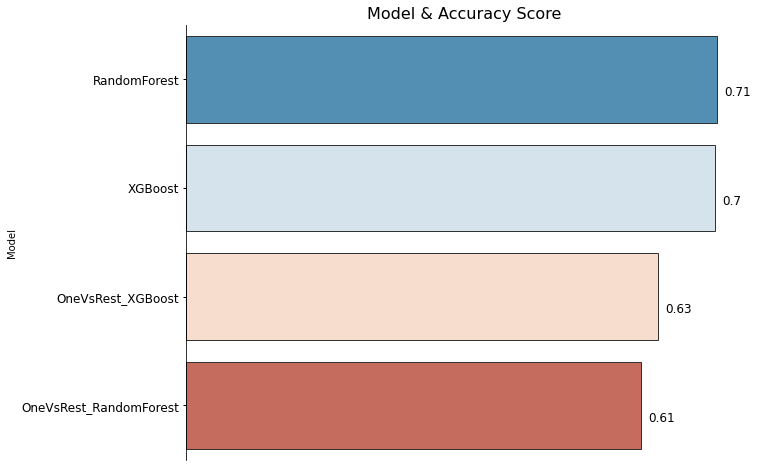

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

classifier = ["RandomForest", "OneVsRest_RandomForest", "XGBoost", "OneVsRest_XGBoost"]

model = pd.DataFrame([accuracy_score(y_val, y_pred_forest_val),
                         accuracy_score(y_val, y_pred_xgb_val),
                         accuracy_score(y_val, y_pred_onerest_forest_val),
                         accuracy_score(y_val, y_pred_onerest_xgb_val)],
                    classifier).reset_index()
model.columns = ["Model", "acc_score"]
model.sort_values("acc_score",ascending = False,inplace=True)
model.reset_index(drop=True,inplace = True)


f, ax = plt.subplots(figsize=(10,8))
sns.barplot('acc_score','Model',data = model, ax=ax,palette='RdBu_r',edgecolor=".2")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+.55, \
        str(round((i.get_width()), 2)), fontsize=12, color='black') 
kwargs= {'length':3, 'width':1, 'colors':'black','labelsize':'large'}
ax.tick_params(**kwargs)
x_axis = ax.axes.get_xaxis().set_visible(False)
ax.set_title('Model & Accuracy Score',fontsize=16)
sns.despine(bottom=True)
plt.show()

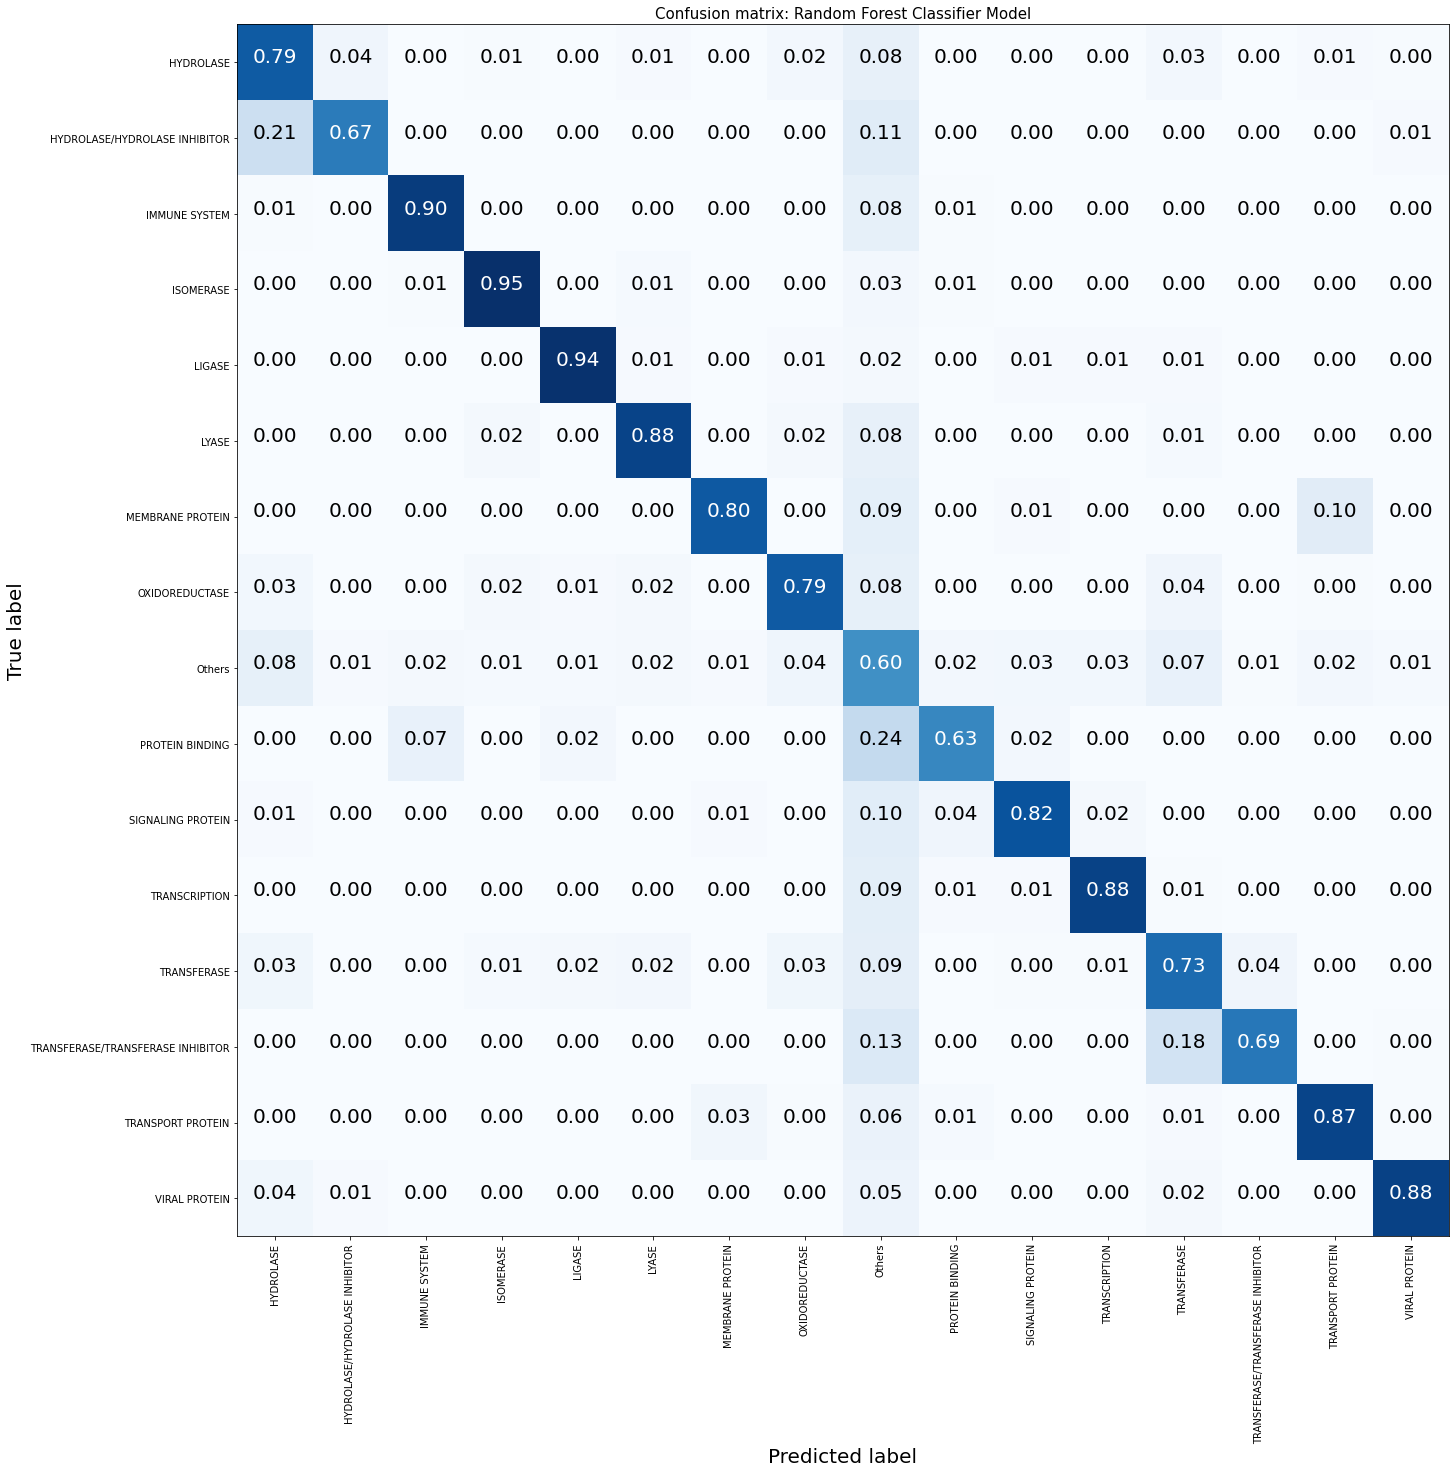

In [99]:
#Credit: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
import itertools

# Compute confusion matrix
def single_model(model):
    clf = model
    clf.fit(X_train_encoded, y_train)
    y_pred = clf.predict(X_val_encoded)
    conf_mx = confusion_matrix(y_pred, y_val, normalize = "true")
    return conf_mx

#plot confusion matrix    
def plot_confusion_matrix(cm, classes,model_name):

    plt.figure(figsize=(20,30))
    cmap = plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix: '+ model_name, fontsize=15)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = 'f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:0.2f}".format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize=20)

    plt.tight_layout()
    plt.ylabel('True label',fontsize=20,color='black')
    plt.xlabel('Predicted label',fontsize=20,color='black')
    np.set_printoptions(precision=2)
    
    return plt.show()
classes = ['HYDROLASE','HYDROLASE/HYDROLASE INHIBITOR','IMMUNE SYSTEM',
          "ISOMERASE", "LIGASE", "LYASE", "MEMBRANE PROTEIN", "OXIDOREDUCTASE",
          "Others", "PROTEIN BINDING", "SIGNALING PROTEIN", "TRANSCRIPTION", "TRANSFERASE",
          "TRANSFERASE/TRANSFERASE INHIBITOR", "TRANSPORT PROTEIN", "VIRAL PROTEIN"]
#plot_confusion_matrix(single_model(ExtraTreesClassifier()), classes,'Extra Trees Classifier Model')
plot_confusion_matrix(single_model(RandomForestClassifier()), classes,'Random Forest Classifier Model')
#plot_confusion_matrix(single_model(SVC()), classes,'Support Vector Classifier Model')

In [103]:
y_pred_forest_test = forest.predict(X_test_encoded)

print('\n <RandomForestClassifier>')
print('테스트데이터 정확도: ', accuracy_score(y_test, y_pred_forest_test))
print('\n classification_report \n ', classification_report(y_test, y_pred_forest_test))


 <RandomForestClassifier>
테스트데이터 정확도:  0.7006443694384781

 classification_report 
                                     precision    recall  f1-score   support

                        HYDROLASE       0.80      0.71      0.75      2758
    HYDROLASE/HYDROLASE INHIBITOR       0.72      0.60      0.65       400
                    IMMUNE SYSTEM       0.91      0.72      0.80       593
                        ISOMERASE       0.95      0.58      0.72       371
                           LIGASE       0.92      0.45      0.60       298
                            LYASE       0.88      0.61      0.72       657
                 MEMBRANE PROTEIN       0.81      0.49      0.61       203
                   OXIDOREDUCTASE       0.79      0.74      0.76      1687
                           Others       0.59      0.86      0.70      5157
                  PROTEIN BINDING       0.78      0.19      0.30       231
                SIGNALING PROTEIN       0.80      0.31      0.45       349
             

### 모델 학습 및 평가 (RandomForest)

In [12]:
'''
#RandomForestClassifier_Hyperparameter tuning - RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

#Model 생성
#RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100
                                , random_state = 2
                                , n_jobs = -1
                                , max_depth = 10
                                , criterion = "entropy"
                                , class_weight = "balanced")


#RandomizedSearchCV에 사용될 하이퍼파라미터(hyperparameter) 목록들 
hyperF = {'n_estimators': randint(300, 800), #랜덤 포레스트를 구성하는 나무 수
          'max_depth': randint(10, 50), # 분류 모델의 깊이
          'max_features': uniform(0, 1), #데이터의 feature를 참조할 비율
          'min_samples_split': randint(5, 50), #노드를 분할하기 위한 최소한의 데이터 수
          'min_samples_leaf': randint(5, 40)} #리프 노드가 되기 위한 최소한의 샘플 수 

#RandomizedSearchCV >> 지정한 범위들 중 랜덤으로 뽑아 최적의 하이퍼 파라미터를 튜닝
clf_forest = RandomizedSearchCV(
    forest, 
    param_distributions = hyperF, 
    n_iter = 200, #hyper_parameter를 뽑아 학습할 횟수
    cv = 3, #Cross-validation 수
    scoring = 'f1_weighted', #학습 시키는 모델의 우수성에 대한 기준이 되는 척도
    verbose = 1, #상세한 logging을 출력
    n_jobs = -1, #CPU
    random_state = 1
    )

#RandomizedSearchCV로 찾은 최적의 하이퍼 파라미터를 이용해 모델을 학습
clf_forest.fit(X_train_encoded, y_train)
'''

'\n#RandomForestClassifier_Hyperparameter tuning - RandomizedSearchCV\nfrom scipy.stats import randint, uniform\nfrom sklearn.model_selection import RandomizedSearchCV\n\n#Model 생성\n#RandomForestClassifier\nforest = RandomForestClassifier(n_estimators = 100\n                                , random_state = 2\n                                , n_jobs = -1\n                                , max_depth = 10\n                                , criterion = "entropy"\n                                , class_weight = "balanced")\n\n\n#RandomizedSearchCV에 사용될 하이퍼파라미터(hyperparameter) 목록들 \nhyperF = {\'n_estimators\': randint(300, 800), #랜덤 포레스트를 구성하는 나무 수\n          \'max_depth\': randint(10, 50), # 분류 모델의 깊이\n          \'max_features\': uniform(0, 1), #데이터의 feature를 참조할 비율\n          \'min_samples_split\': randint(5, 50), #노드를 분할하기 위한 최소한의 데이터 수\n          \'min_samples_leaf\': randint(5, 40)} #리프 노드가 되기 위한 최소한의 샘플 수 \n\n#RandomizedSearchCV >> 지정한 범위들 중 랜덤으로 뽑아 최적의 하이퍼 파라미터를 튜닝\nclf_forest = Ran

In [13]:
#RandomizedSearchCV로 찾은 최적의 하이퍼 파라미터 출력
#clf_forest.best_params_
'''
{'max_depth': 33,
 'max_features': 0.17805335055828198,
 'min_samples_leaf': 7,
 'min_samples_split': 15,
 'n_estimators': 768}
 '''

"\n{'max_depth': 33,\n 'max_features': 0.17805335055828198,\n 'min_samples_leaf': 7,\n 'min_samples_split': 15,\n 'n_estimators': 768}\n "

In [14]:
from sklearn.metrics import accuracy_score

#가장 성능이 좋은 모델을 불러옴
#forest_clf = clf_forest.best_estimator_
forest_clf = RandomForestClassifier(n_estimators = 768
                                , random_state = 2
                                , n_jobs = -1
                                , max_depth = 33
                                , min_samples_leaf = 7
                                , min_samples_split = 15
                                , max_features = 0.17805335055828198
                                , criterion = "entropy"
                                , class_weight = "balanced")

#학습
forest_clf.fit(X_train_encoded, y_train)

#예측
y_pred_forest_clf_train = forest_clf.predict(X_train_encoded)
y_pred_forest_clf_val = forest_clf.predict(X_val_encoded)

#검증정확도 및 classification_report
print('훈련 정확도: ', accuracy_score(y_train, y_pred_forest_clf_train))
print('검증 정확도: ', accuracy_score(y_val, y_pred_forest_clf_val))
print('classification_report \n', classification_report(y_val, y_pred_forest_clf_val))

훈련 정확도:  0.8301401913967359
검증 정확도:  0.604096348573182
classification_report 
                                    precision    recall  f1-score   support

                        HYDROLASE       0.74      0.62      0.67      2206
    HYDROLASE/HYDROLASE INHIBITOR       0.41      0.73      0.52       320
                    IMMUNE SYSTEM       0.61      0.85      0.71       475
                        ISOMERASE       0.69      0.58      0.63       297
                           LIGASE       0.52      0.59      0.55       239
                            LYASE       0.63      0.69      0.66       525
                 MEMBRANE PROTEIN       0.56      0.65      0.60       162
                   OXIDOREDUCTASE       0.59      0.79      0.67      1350
                           Others       0.71      0.48      0.57      4126
                  PROTEIN BINDING       0.26      0.26      0.26       185
                SIGNALING PROTEIN       0.46      0.39      0.42       280
                    

In [15]:
#OneVsRestClassifier_RandomForest

#model
one_rest_forest_clf = OneVsRestClassifier(forest_clf, n_jobs=-1)

#학습
one_rest_forest_best = one_rest_forest_clf.fit(X_train_encoded, y_train)

#예측
y_pred_onerest_forest_clf_train = one_rest_forest_clf.predict(X_train_encoded)
y_pred_onerest_forest_clf_val = one_rest_forest_clf.predict(X_val_encoded)

#검증정확도 및 classification_report
print('훈련 정확도: ', accuracy_score(y_train, y_pred_onerest_forest_clf_train))
print('검증 정확도: ', accuracy_score(y_val, y_pred_onerest_forest_clf_val))
print('classification_report \n', classification_report(y_val, y_pred_onerest_forest_clf_val))

훈련 정확도:  0.9495234259632166
검증 정확도:  0.6864835839214483
classification_report 
                                    precision    recall  f1-score   support

                        HYDROLASE       0.77      0.70      0.73      2206
    HYDROLASE/HYDROLASE INHIBITOR       0.57      0.62      0.59       320
                    IMMUNE SYSTEM       0.83      0.78      0.80       475
                        ISOMERASE       0.92      0.49      0.64       297
                           LIGASE       0.86      0.48      0.62       239
                            LYASE       0.80      0.64      0.71       525
                 MEMBRANE PROTEIN       0.74      0.48      0.58       162
                   OXIDOREDUCTASE       0.73      0.75      0.74      1350
                           Others       0.62      0.78      0.69      4126
                  PROTEIN BINDING       0.63      0.13      0.22       185
                SIGNALING PROTEIN       0.79      0.29      0.42       280
                   

### Permutation  importance & feature selection

In [101]:
#경고 메시지 제어
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    forest.fit(X_train_encoded, y_train), # model
    scoring='accuracy', # metric
    n_iter=3, # 다른 random seed를 사용하여 5번 반복
    random_state=2)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업
permuter.fit(X_val_encoded, y_val);

In [116]:
# feature 별로 permutation importance score 확인
feature_names = X_val.columns.tolist()
feature_importance = pd.DataFrame(permuter.feature_importances_, feature_names, columns = ["Weight"])
feature_importance.sort_values(by = "Weight", ascending=False).style.background_gradient(cmap = "coolwarm").set_precision(3)

,Weight
chainId,0.044
G,0.040
A,0.029
W,0.017
C,0.017
L,0.014
E,0.013
non-polar_amino,0.013
polar_amino,0.013
I,0.012


In [105]:
#  feature 별로 permutation importance score 확인 (표준편차 포함)
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 보여줌.
    feature_names = feature_names) # list 형식으로 넣어야 함.

Weight,Feature
0.0437 ± 0.0035,chainId
0.0396 ± 0.0026,G
0.0294 ± 0.0019,A
0.0171 ± 0.0015,W
0.0168 ± 0.0021,C
0.0136 ± 0.0012,L
0.0134 ± 0.0011,E
0.0129 ± 0.0026,non-polar_amino
0.0127 ± 0.0022,polar_amino
0.0118 ± 0.0007,I


In [11]:
#feature selection
X_train_encoded_selected = X_train_encoded.drop("experimentalTechnique", axis = 1)
X_val_encoded_selected = X_val_encoded.drop("experimentalTechnique", axis = 1)

### 모델 학습 및 평가 (XGBoost)

In [54]:
#XGBoostClassifier_Hyperparameter tuning - RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV
import numpy as np

#Model 생성
#XGBClassifier

eval_set = [(X_val_encoded_selected, y_val)]

xgb = XGBClassifier(n_estimators = 1000
                    , random_state = 1
                    , n_jobs = -1
                    , num_class = 16
                    , eval_metric = "mlogloss"
                    , objective = "multi:softmax"
                    , learning_rate = 0.2)

#RandomizedSearchCV에 사용될 하이퍼파라미터(hyperparameter) 목록들 
hyperF = {#'max_depth': np.arange(20, 25, 1), # 분류 모델의 깊이
          'gamma': np.arange(0, 7, 1),
          'min_child_weight': np.arange(0, 7, 1)}

#RandomizedSearchCV >> 지정한 범위들 중 랜덤으로 뽑아 최적의 하이퍼 파라미터를 튜닝
clf_xgb = GridSearchCV(xgb, hyperF, cv = 3, scoring = 'balanced_accuracy',verbose = 1, n_jobs = -1)

#RandomizedSearchCV로 찾은 최적의 하이퍼 파라미터를 이용해 모델을 학습
#clf_xgb.fit(X_train_encoded_selected, y_train, eval_set = eval_set)
clf_xgb.fit(X_train_encoded_selected, y_train, eval_set = eval_set, early_stopping_rounds = 50, eval_metric = "mlogloss")

Fitting 3 folds for each of 49 candidates, totalling 147 fits


/Users/doukkim/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:2.45014
[1]	validation_0-mlogloss:2.28209
[2]	validation_0-mlogloss:2.16371
[3]	validation_0-mlogloss:2.07123
[4]	validation_0-mlogloss:1.99970
[5]	validation_0-mlogloss:1.94096
[6]	validation_0-mlogloss:1.89089
[7]	validation_0-mlogloss:1.84693
[8]	validation_0-mlogloss:1.80888
[9]	validation_0-mlogloss:1.77704
[10]	validation_0-mlogloss:1.74905
[11]	validation_0-mlogloss:1.72356
[12]	validation_0-mlogloss:1.70078
[13]	validation_0-mlogloss:1.68253
[14]	validation_0-mlogloss:1.66325
[15]	validation_0-mlogloss:1.64742
[16]	validation_0-mlogloss:1.63170
[17]	validation_0-mlogloss:1.61709
[18]	validation_0-mlogloss:1.60421
[19]	validation_0-mlogloss:1.59409
[20]	validation_0-mlogloss:1.58305
[21]	validation_0-mlogloss:1.57400
[22]	validation_0-mlogloss:1.56386
[23]	validation_0-mlogloss:1.55483
[24]	validation_0-mlogloss:1.54553
[25]	validation_0-mlogloss:1.53840
[26]	validation_0-mlogloss:1.52942
[27]	validation_0-mlogloss:1.52155
[28]	validation_0-mlogloss:1.5

[231]	validation_0-mlogloss:1.17935
[232]	validation_0-mlogloss:1.17889
[233]	validation_0-mlogloss:1.17812
[234]	validation_0-mlogloss:1.17755
[235]	validation_0-mlogloss:1.17674
[236]	validation_0-mlogloss:1.17610
[237]	validation_0-mlogloss:1.17554
[238]	validation_0-mlogloss:1.17503
[239]	validation_0-mlogloss:1.17471
[240]	validation_0-mlogloss:1.17369
[241]	validation_0-mlogloss:1.17304
[242]	validation_0-mlogloss:1.17225
[243]	validation_0-mlogloss:1.17160
[244]	validation_0-mlogloss:1.17111
[245]	validation_0-mlogloss:1.17044
[246]	validation_0-mlogloss:1.17023
[247]	validation_0-mlogloss:1.16983
[248]	validation_0-mlogloss:1.16926
[249]	validation_0-mlogloss:1.16860
[250]	validation_0-mlogloss:1.16823
[251]	validation_0-mlogloss:1.16775
[252]	validation_0-mlogloss:1.16755
[253]	validation_0-mlogloss:1.16711
[254]	validation_0-mlogloss:1.16652
[255]	validation_0-mlogloss:1.16596
[256]	validation_0-mlogloss:1.16586
[257]	validation_0-mlogloss:1.16572
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:1.11557
[460]	validation_0-mlogloss:1.11544
[461]	validation_0-mlogloss:1.11542
[462]	validation_0-mlogloss:1.11543
[463]	validation_0-mlogloss:1.11542
[464]	validation_0-mlogloss:1.11555
[465]	validation_0-mlogloss:1.11548
[466]	validation_0-mlogloss:1.11555
[467]	validation_0-mlogloss:1.11540
[468]	validation_0-mlogloss:1.11515
[469]	validation_0-mlogloss:1.11513
[470]	validation_0-mlogloss:1.11493
[471]	validation_0-mlogloss:1.11494
[472]	validation_0-mlogloss:1.11497
[473]	validation_0-mlogloss:1.11465
[474]	validation_0-mlogloss:1.11467
[475]	validation_0-mlogloss:1.11465
[476]	validation_0-mlogloss:1.11460
[477]	validation_0-mlogloss:1.11459
[478]	validation_0-mlogloss:1.11455
[479]	validation_0-mlogloss:1.11459
[480]	validation_0-mlogloss:1.11453
[481]	validation_0-mlogloss:1.11460
[482]	validation_0-mlogloss:1.11459
[483]	validation_0-mlogloss:1.11460
[484]	validation_0-mlogloss:1.11458
[485]	validation_0-mlogloss:1.11461
[486]	validation_0-mlogloss:

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.2, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...00, n_jobs=-1, num_class=16,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', random_state=1,
                                     reg_alpha=None, reg_lambda=None,
       

In [55]:
#RandomizedSearchCV로 찾은 최적의 하이퍼 파라미터 출력
clf_xgb.best_params_

{'gamma': 0, 'min_child_weight': 6}

In [59]:
from sklearn.metrics import accuracy_score

#가장 성능이 좋은 모델을 불러옴
xgb_clf = clf_xgb.best_estimator_

#학습
xgb_clf.fit(X_train_encoded_selected, y_train, eval_set = eval_set, early_stopping_rounds = 50, eval_metric = "mlogloss")

#예측
y_pred_xgb_clf_train = xgb_clf.predict(X_train_encoded_selected)
y_pred_xgb_clf_val = xgb_clf.predict(X_val_encoded_selected)

#검증정확도 및 classification_report
print('훈련 정확도: ', accuracy_score(y_train, y_pred_xgb_clf_train))
print('검증 정확도: ', accuracy_score(y_val, y_pred_xgb_clf_val))
print('classification_report \n', classification_report(y_val, y_pred_xgb_clf_val))

/Users/doukkim/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:2.45014
[1]	validation_0-mlogloss:2.28209
[2]	validation_0-mlogloss:2.16371
[3]	validation_0-mlogloss:2.07123
[4]	validation_0-mlogloss:1.99970
[5]	validation_0-mlogloss:1.94096
[6]	validation_0-mlogloss:1.89089
[7]	validation_0-mlogloss:1.84693
[8]	validation_0-mlogloss:1.80888
[9]	validation_0-mlogloss:1.77704
[10]	validation_0-mlogloss:1.74905
[11]	validation_0-mlogloss:1.72356
[12]	validation_0-mlogloss:1.70078
[13]	validation_0-mlogloss:1.68253
[14]	validation_0-mlogloss:1.66325
[15]	validation_0-mlogloss:1.64742
[16]	validation_0-mlogloss:1.63170
[17]	validation_0-mlogloss:1.61709
[18]	validation_0-mlogloss:1.60421
[19]	validation_0-mlogloss:1.59409
[20]	validation_0-mlogloss:1.58305
[21]	validation_0-mlogloss:1.57400
[22]	validation_0-mlogloss:1.56386
[23]	validation_0-mlogloss:1.55483
[24]	validation_0-mlogloss:1.54553
[25]	validation_0-mlogloss:1.53840
[26]	validation_0-mlogloss:1.52942
[27]	validation_0-mlogloss:1.52155
[28]	validation_0-mlogloss:1.5

[231]	validation_0-mlogloss:1.17935
[232]	validation_0-mlogloss:1.17889
[233]	validation_0-mlogloss:1.17812
[234]	validation_0-mlogloss:1.17755
[235]	validation_0-mlogloss:1.17674
[236]	validation_0-mlogloss:1.17610
[237]	validation_0-mlogloss:1.17554
[238]	validation_0-mlogloss:1.17503
[239]	validation_0-mlogloss:1.17471
[240]	validation_0-mlogloss:1.17369
[241]	validation_0-mlogloss:1.17304
[242]	validation_0-mlogloss:1.17225
[243]	validation_0-mlogloss:1.17160
[244]	validation_0-mlogloss:1.17111
[245]	validation_0-mlogloss:1.17044
[246]	validation_0-mlogloss:1.17023
[247]	validation_0-mlogloss:1.16983
[248]	validation_0-mlogloss:1.16926
[249]	validation_0-mlogloss:1.16860
[250]	validation_0-mlogloss:1.16823
[251]	validation_0-mlogloss:1.16775
[252]	validation_0-mlogloss:1.16755
[253]	validation_0-mlogloss:1.16711
[254]	validation_0-mlogloss:1.16652
[255]	validation_0-mlogloss:1.16596
[256]	validation_0-mlogloss:1.16586
[257]	validation_0-mlogloss:1.16572
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:1.11557
[460]	validation_0-mlogloss:1.11544
[461]	validation_0-mlogloss:1.11542
[462]	validation_0-mlogloss:1.11543
[463]	validation_0-mlogloss:1.11542
[464]	validation_0-mlogloss:1.11555
[465]	validation_0-mlogloss:1.11548
[466]	validation_0-mlogloss:1.11555
[467]	validation_0-mlogloss:1.11540
[468]	validation_0-mlogloss:1.11515
[469]	validation_0-mlogloss:1.11513
[470]	validation_0-mlogloss:1.11493
[471]	validation_0-mlogloss:1.11494
[472]	validation_0-mlogloss:1.11497
[473]	validation_0-mlogloss:1.11465
[474]	validation_0-mlogloss:1.11467
[475]	validation_0-mlogloss:1.11465
[476]	validation_0-mlogloss:1.11460
[477]	validation_0-mlogloss:1.11459
[478]	validation_0-mlogloss:1.11455
[479]	validation_0-mlogloss:1.11459
[480]	validation_0-mlogloss:1.11453
[481]	validation_0-mlogloss:1.11460
[482]	validation_0-mlogloss:1.11459
[483]	validation_0-mlogloss:1.11460
[484]	validation_0-mlogloss:1.11458
[485]	validation_0-mlogloss:1.11461
[486]	validation_0-mlogloss:

In [57]:
#OneVsRestClassifier_XGBoostClassifier

#model
one_rest_xgb_clf = OneVsRestClassifier(xgb_clf, n_jobs=-1)

#학습
one_rest_xgb_best = one_rest_xgb_clf.fit(X_train_encoded_selected, y_train)

#예측
y_pred_onerest_xgb_clf_train = one_rest_xgb_best.predict(X_train_encoded_selected)
y_pred_onerest_xgb_clf_val = one_rest_xgb_best.predict(X_val_encoded_selected)

#검증정확도 및 classification_report
print('훈련 정확도: ', accuracy_score(y_train, y_pred_onerest_xgb_clf_train))
print('검증 정확도: ', accuracy_score(y_val, y_pred_onerest_xgb_clf_val))
print('classification_report \n', classification_report(y_val, y_pred_onerest_xgb_clf_val))

훈련 정확도:  0.9950520683504976
검증 정확도:  0.6977600490948144
classification_report 
                                    precision    recall  f1-score   support

                        HYDROLASE       0.74      0.73      0.74      2206
    HYDROLASE/HYDROLASE INHIBITOR       0.69      0.59      0.64       320
                    IMMUNE SYSTEM       0.86      0.77      0.81       475
                        ISOMERASE       0.91      0.51      0.65       297
                           LIGASE       0.83      0.50      0.63       239
                            LYASE       0.80      0.64      0.71       525
                 MEMBRANE PROTEIN       0.76      0.53      0.63       162
                   OXIDOREDUCTASE       0.79      0.74      0.76      1350
                           Others       0.62      0.81      0.70      4126
                  PROTEIN BINDING       0.62      0.17      0.27       185
                SIGNALING PROTEIN       0.75      0.30      0.43       280
                   

In [122]:
import matplotlib.pyplot as plt
from pdpbox.pdp import pdp_isolate, pdp_plot
import shap

ImportError: cannot import name 'pdp' from 'pdpbox.pdp' (/Users/doukkim/opt/anaconda3/lib/python3.8/site-packages/pdpbox/pdp.py)

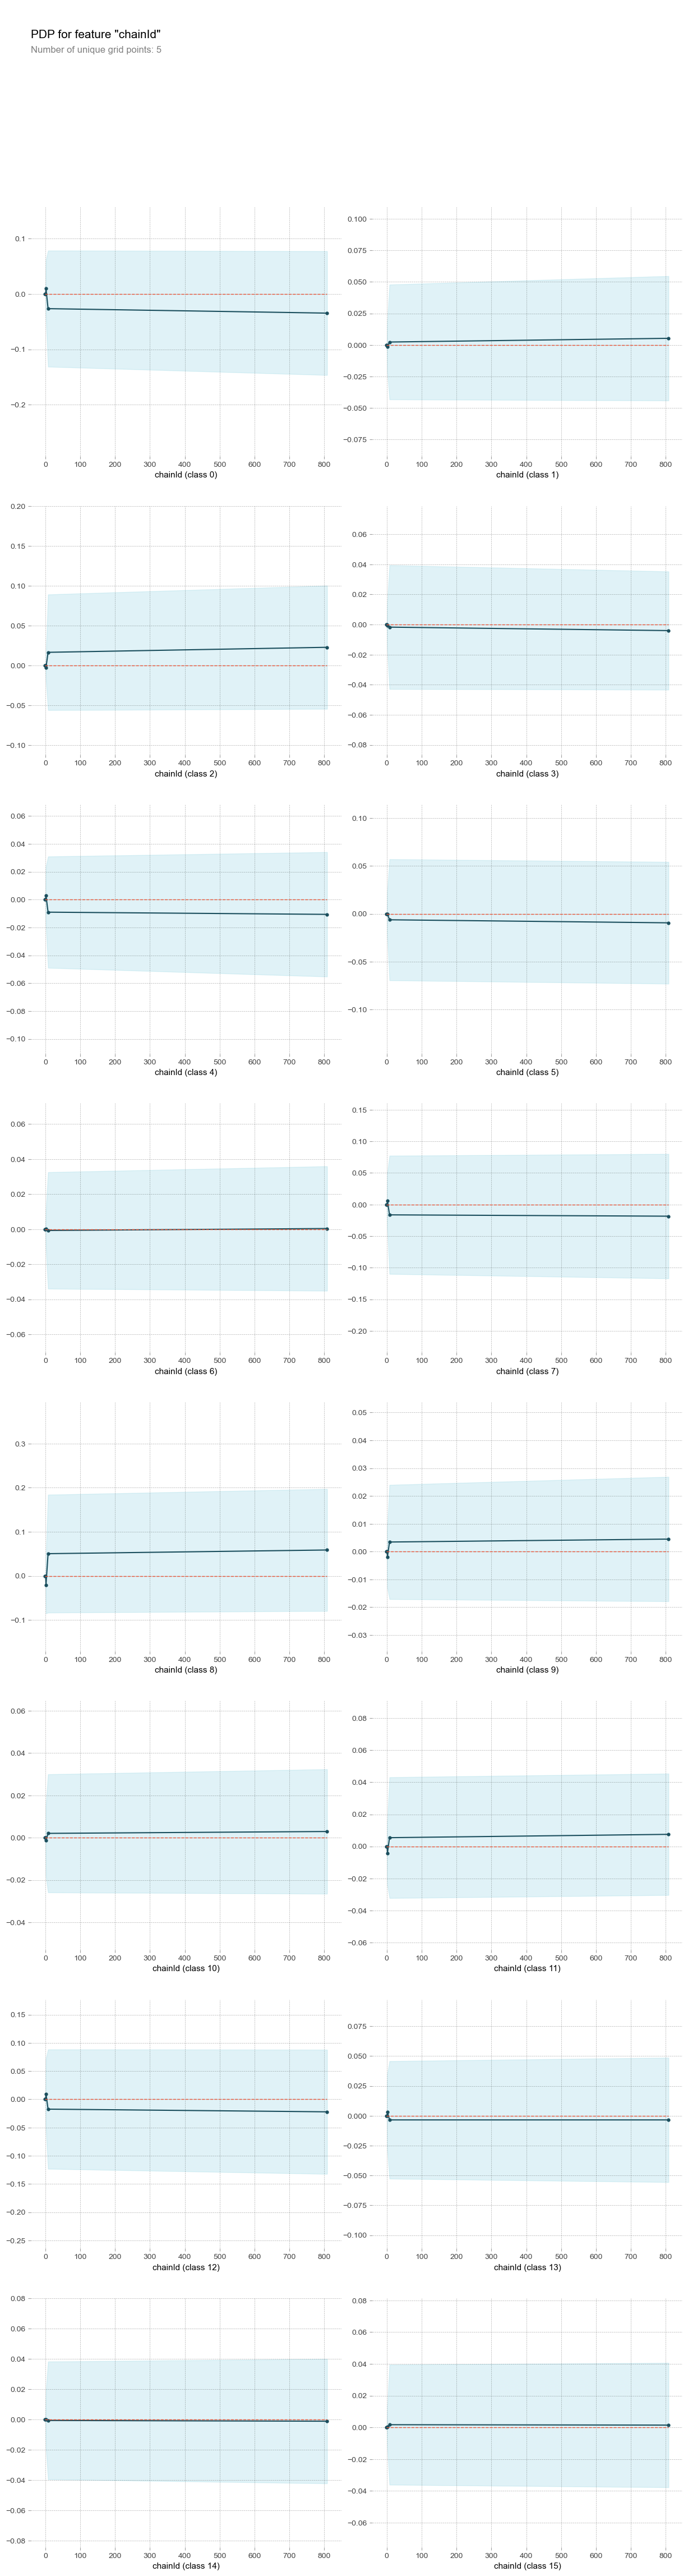

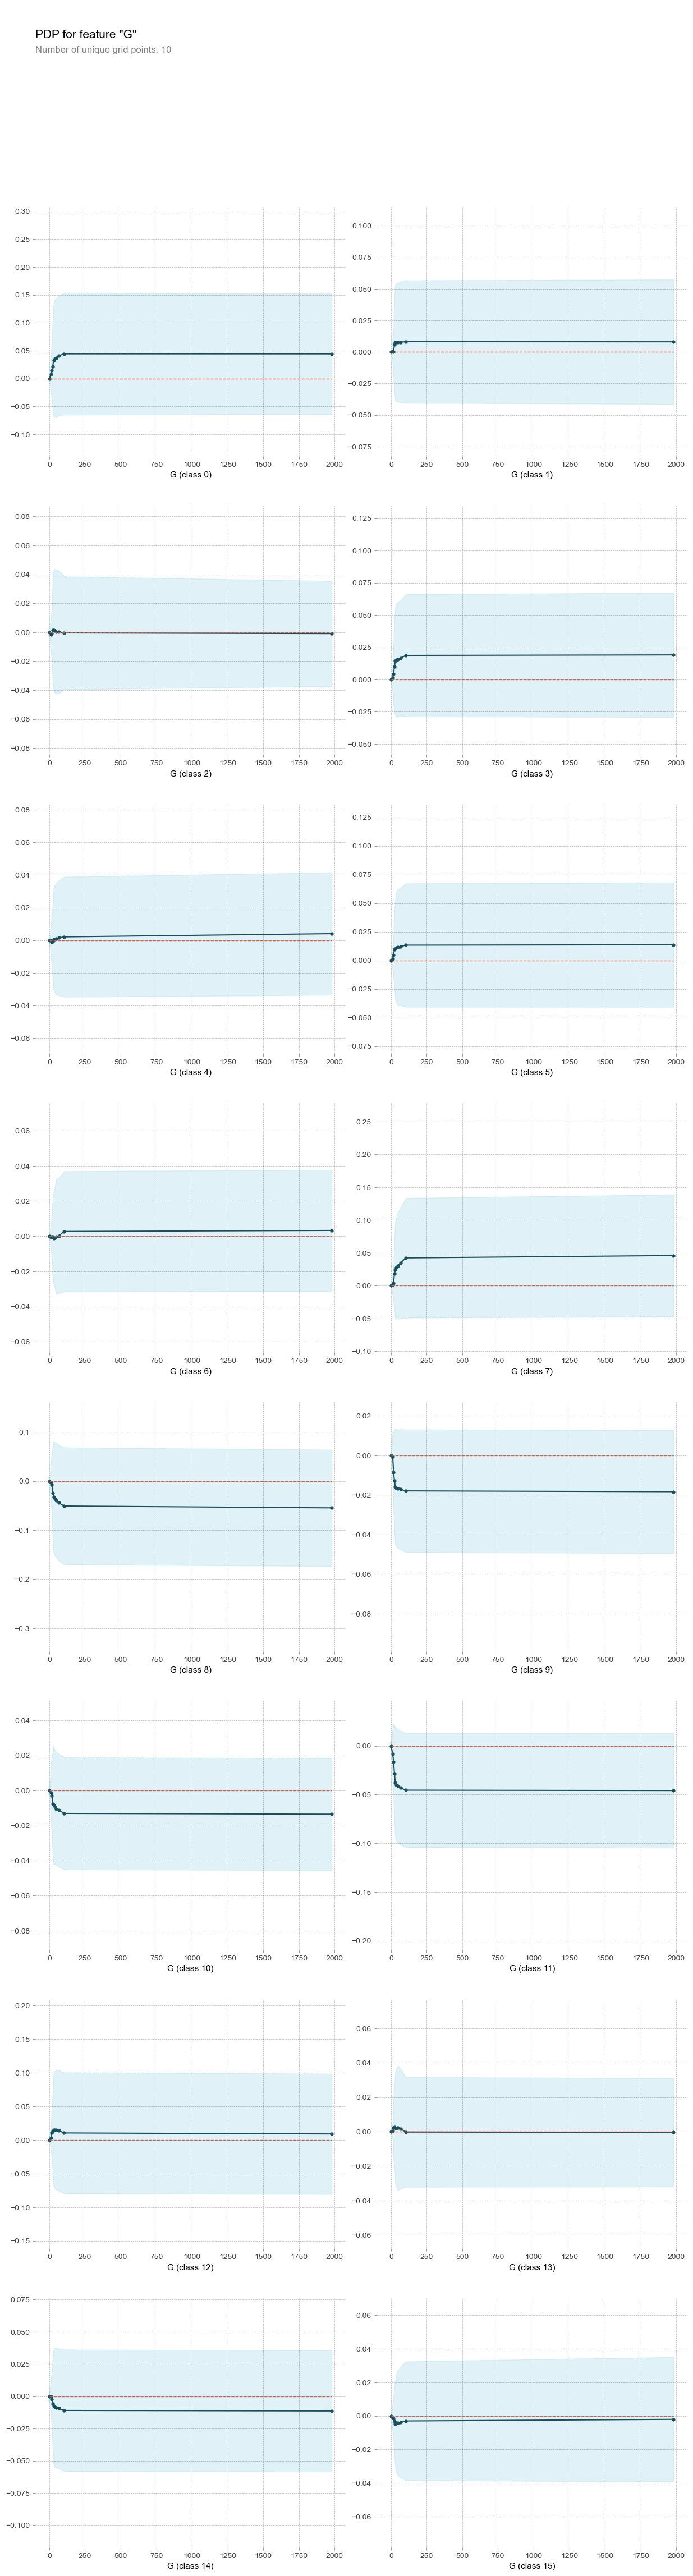

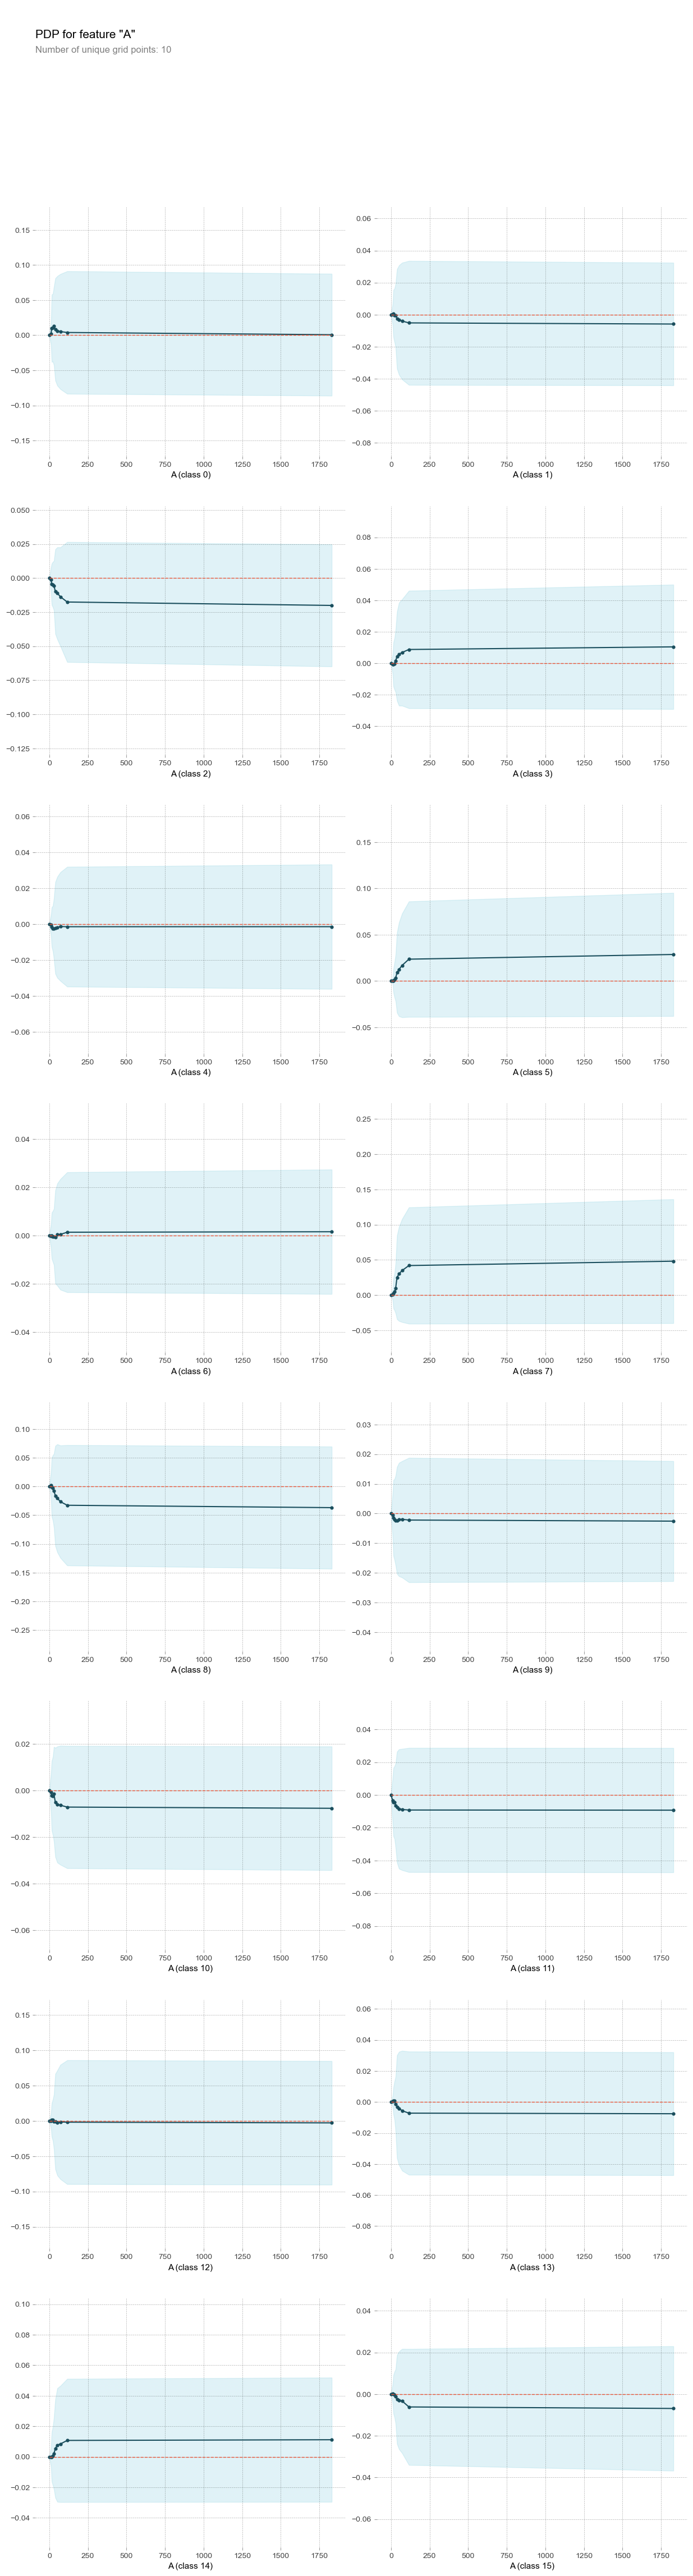

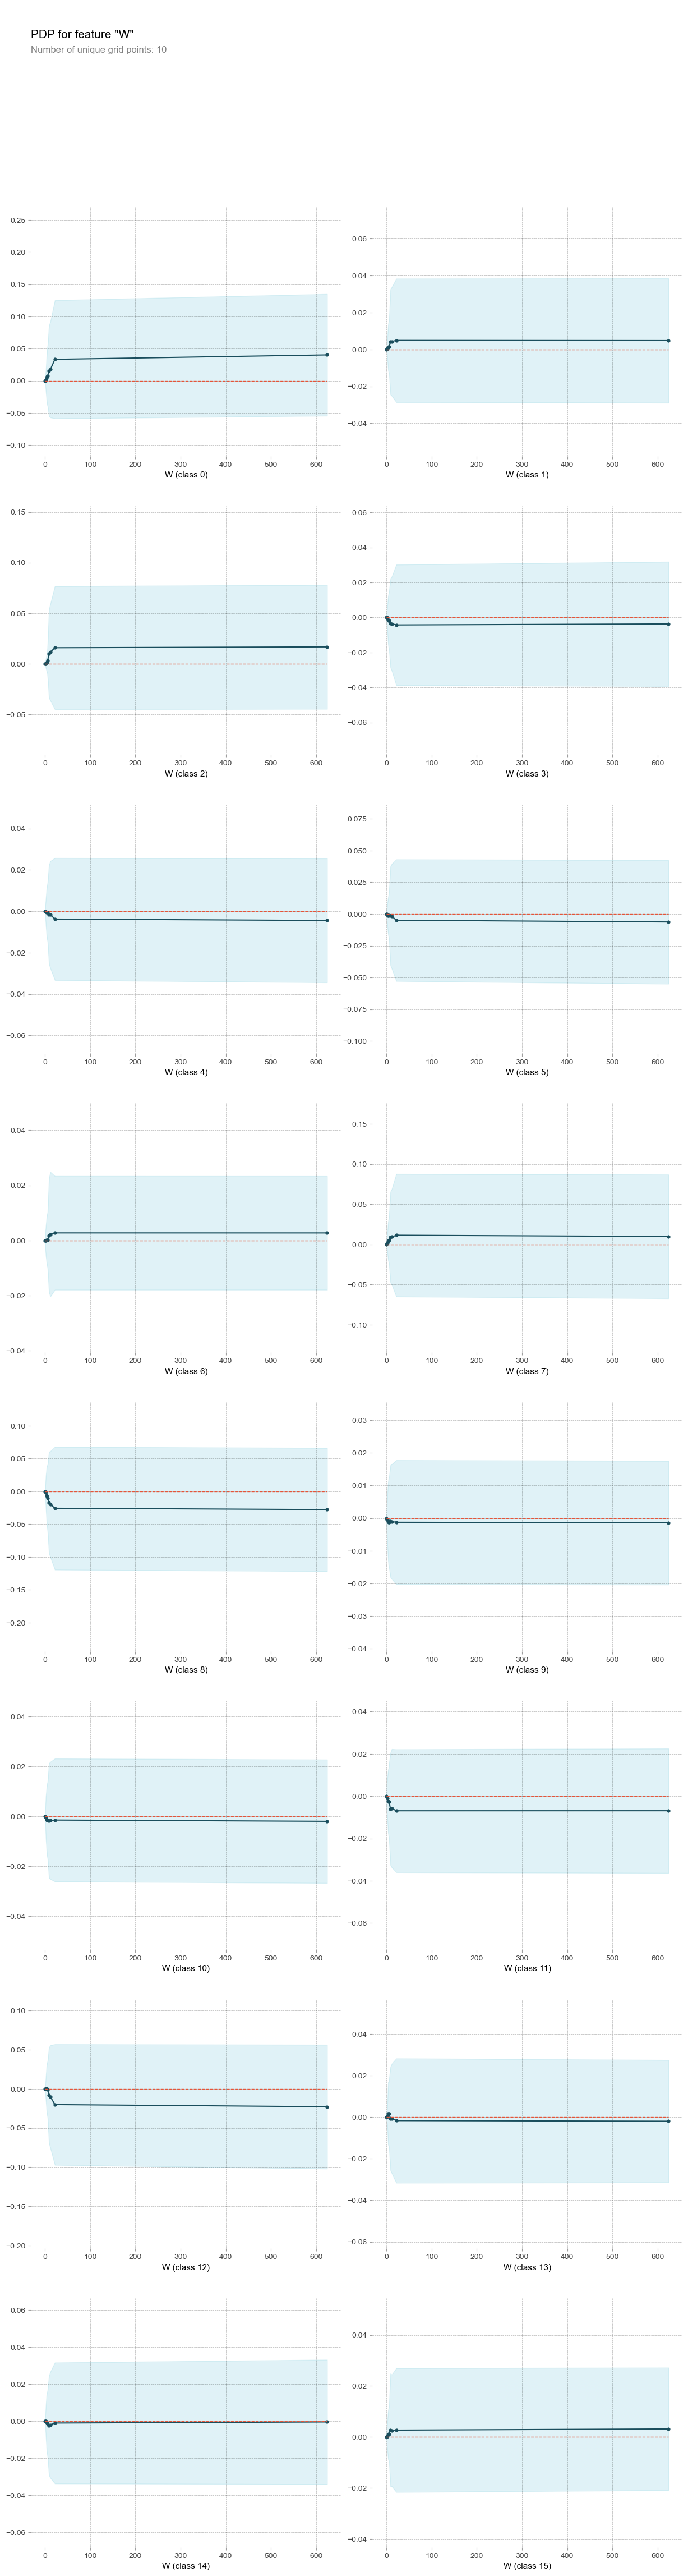

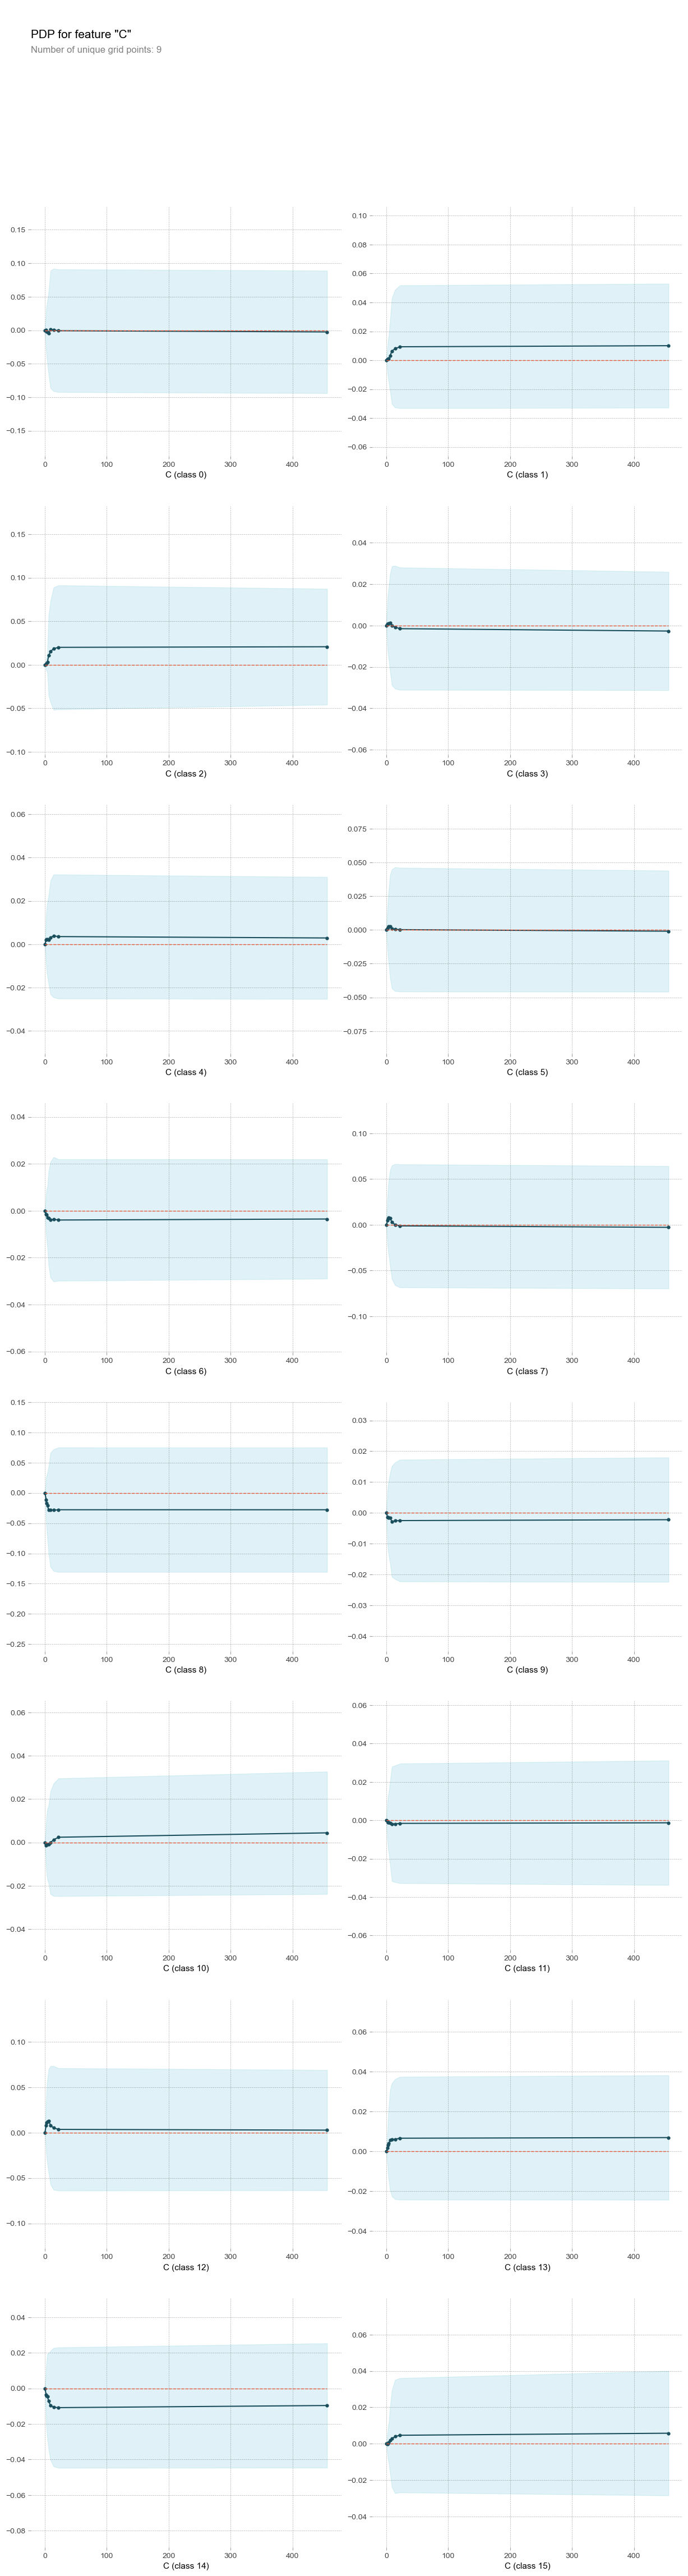

In [124]:
plt.rcParams["figure.dpi"] = 100 #dpi(dots per inch) 수치를 조정해 이미지 화질을 조정가능

feature_list = ["chainId", "G", "A", "W", "C"]

for feature in feature_list:
    isolated = pdp_isolate(
        model = forest,
        dataset = X_val_encoded,
        model_features = X_val_encoded.columns,
        feature = feature)
    
    pdp_plot(isolated, feature_name = feature);

In [133]:
#모델이 이렇게 예측한 이유를 알기 위해 SHAP Force Plot을 그리기

## UnicodeDecoderError 발생시 xgboost 1.1-> 1.0 다운그레이드 (conda install -c conda-forge xgboost=1.0)
import shap

row = X_val_encoded

explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시
)

KeyboardInterrupt: 